In [2]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=a87a6fb8cce0b4c552da37e8523eff6311fa78a902189fe1b6d6f5b0f5b55f93
  Stored in directory: c:\users\elcot\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


<Figure size 432x288 with 0 Axes>

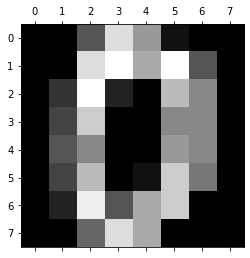

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score

0.95



Variance Ratio

[0.14659533 0.13563025 0.11901049 0.08581575 0.05884243 0.04888294
 0.04350605 0.0369122  0.03334079 0.03064325]



Variance Ratio




Confusion Metrics

[[36  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  1  2]
 [ 0  0 34  0  0  0  0  0  2  0]
 [ 0  0  0 38  0  1  0  0  0  0]
 [ 1  1  0  0 31  0  0  1  0  0]
 [ 0  2  0  0  0 29  0  0  0  2]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  1  0  0  0  0 30  2]
 [ 0  0  0  1  2  2  0  1  0 33]]



Classfication Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.91      0.89      0.90        35
           2       1.00      0.94      0.97        36
           3       0.95      0.97      0.96        39
           4       0.91      0.91      0.91        34
           5       0.91      0.88      0.89        33
           6       0.97      1.00      0.99        36
           7     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
# https://medium.com/@parthvadhadiya424/digit-recognition-using-sk-learn-ea729fec6e3d
# http://www.thejavageek.com/2018/04/30/principal-component-analysis-using-python/

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1.Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection
# and write a helper function to plot the image using matplotlib.
# [Hint:Explore datasets module from scikit learn]
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

images = digits.images.reshape(digits.images.shape[0], -1)
labels = digits.target


# 2.Make a train -test split with 20% of the data set aside for testing.
# Fit a logistic regression model and observe the accuracy.
train_x, test_x, train_y, test_y = train_test_split(
    images, labels, random_state=10, test_size=0.20)

log_model = LogisticRegression()
log_model.fit(train_x, train_y)

predicted_values = log_model.predict(test_x)

print("Accuracy Score\n")
print(metrics.accuracy_score(test_y, predicted_values))
print("\n\n")

# 3.Using scikit learn perform a PCA transformation such that the transformed dataset
# can explain 95% of the variance in the original dataset. Find out the number of
# components in the projected subspace.
# [Hint:Refer to decomposition module of scikit learn]

# To get 95% of variance n_components should be 10
model_pca = PCA(n_components=10)

model_pca.fit(images)

# transform the data
model_pca.fit(train_x, train_y)
train_x = model_pca.transform(train_x)
test_x = model_pca.transform(test_x)

print("Variance Ratio\n")
print(model_pca.explained_variance_ratio_)
print("\n\n")


# 4.Transform the dataset and fit a logistic regression and observe the accuracy.
# Compare it with the previous model andcomment on the accuracy.
# [Hint: Project both the train and test samples to the new subspace]'
log_model_1 = LogisticRegression()
log_model_1.fit(train_x, train_y)

predicted_values_1 = log_model_1.predict(test_x)

print("Variance Ratio\n")
metrics.accuracy_score(predicted_values_1, test_y)
print("\n\n")


# 5.Compute the confusion matrix and count the number of instances that has gone wrong.
# For each of the wrong sample,plot the digit along with predicted and original label.
conf_metrics = metrics.confusion_matrix(predicted_values_1, test_y)
classification_report = metrics.classification_report(
    predicted_values_1, test_y)

print("Confusion Metrics\n")
print(conf_metrics)
print("\n\n")

print("Classfication Report\n")
print(classification_report)
print("\n\n")
